# Import dataset and packages

In [1]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

In [2]:
spot_1950 = pd.read_csv("C:/Users/coderflo1/Desktop/Spotify_songs/1950.csv",low_memory=False)
spot_1960 = pd.read_csv("C:/Users/coderflo1/Desktop/Spotify_songs/1960.csv",low_memory=False)
spot_1970 = pd.read_csv("C:/Users/coderflo1/Desktop/Spotify_songs/1970.csv",low_memory=False)
spot_1980 = pd.read_csv("C:/Users/coderflo1/Desktop/Spotify_songs/1980.csv",low_memory=False)
spot_1990 = pd.read_csv("C:/Users/coderflo1/Desktop/Spotify_songs/1990.csv",low_memory=False)
spot_2000 = pd.read_csv("C:/Users/coderflo1/Desktop/Spotify_songs/2000.csv",low_memory=False)
spot_2010 = pd.read_csv("C:/Users/coderflo1/Desktop/Spotify_songs/2010.csv",low_memory=False)

In [3]:
# combine the datasets into one
dataset= pd.concat([spot_1950,spot_1960,spot_1970,spot_1980,spot_1990,spot_2000,spot_2010])

In [4]:
dataset

,Number,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,Put Your Head On My Shoulder,Paul Anka,adult standards,2000,116,34,55,-9,10,47,155,75,3,72
1,2,Whatever Will Be Will Be (Que Sera Sera) (with...,Doris Day,adult standards,1948,177,34,42,-11,72,78,123,86,4,62
2,3,Everybody Loves Somebody,Dean Martin,adult standards,2013,81,49,26,-9,34,40,162,81,4,61
3,4,Take Good Care Of My Baby - 1990 Remastered,Bobby Vee,adult standards,2011,82,43,49,-12,12,66,151,70,6,60
4,5,A Teenager In Love,Dion & The Belmonts,adult standards,1959,79,38,56,-9,13,62,158,67,3,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,Stereo Hearts (feat. Adam Levine),Gym Class Heroes,dance pop,2011,90,80,65,-3,27,80,211,3,10,56
96,97,Dynamite,Taio Cruz,dance pop,2011,120,79,76,-4,3,87,203,0,8,56
97,98,Break Your Heart,Taio Cruz,dance pop,2011,122,89,67,-5,24,68,185,0,3,54
98,99,Summer Air,ItaloBrothers,dance pop,2017,102,75,76,-4,8,49,184,6,7,43


In [5]:
# Check attribute types
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 667 entries, 0 to 99
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Number     667 non-null    int64 
 1   title      667 non-null    object
 2   artist     667 non-null    object
 3   top genre  651 non-null    object
 4   year       667 non-null    int64 
 5   bpm        667 non-null    int64 
 6   nrgy       667 non-null    int64 
 7   dnce       667 non-null    int64 
 8   dB         667 non-null    int64 
 9   live       667 non-null    int64 
 10  val        667 non-null    int64 
 11  dur        667 non-null    int64 
 12  acous      667 non-null    int64 
 13  spch       667 non-null    int64 
 14  pop        667 non-null    int64 
dtypes: int64(12), object(3)
memory usage: 83.4+ KB


In [6]:
# Check for null values
dataset_null = dataset[dataset.isnull().any(axis=1)].head()
dataset_null

,Number,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
31,32,If I Give My Heart To You,The Teddy Bears,NaN,2011,113,29,49,-10,12,29,118,86,3,40
32,33,The Lady Is A Tramp,Mel Torme & the Mel-Tones,NaN,2016,138,60,41,-8,41,54,170,81,6,40
42,43,Unchained Melody,The Teddy Bears,NaN,2011,114,44,53,-8,13,47,139,49,3,37
50,51,Someone Elses Roses,Joan Regan,NaN,2019,100,14,29,-10,15,32,143,89,3,34
57,58,No Other Love,Bob Sharples & His Music,NaN,2014,97,31,37,-10,27,10,171,69,3,31


In [7]:
# Drop the rows with null values. Only small number of null values detected. 
# Alternative methods : 1) Insert the value of the most frequently occured genre into cells with null values.  
#                       2) Conduct investigation on the actual genre of the song and add such into the empty cells.
dataset = dataset.dropna()
dataset

,Number,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,Put Your Head On My Shoulder,Paul Anka,adult standards,2000,116,34,55,-9,10,47,155,75,3,72
1,2,Whatever Will Be Will Be (Que Sera Sera) (with...,Doris Day,adult standards,1948,177,34,42,-11,72,78,123,86,4,62
2,3,Everybody Loves Somebody,Dean Martin,adult standards,2013,81,49,26,-9,34,40,162,81,4,61
3,4,Take Good Care Of My Baby - 1990 Remastered,Bobby Vee,adult standards,2011,82,43,49,-12,12,66,151,70,6,60
4,5,A Teenager In Love,Dion & The Belmonts,adult standards,1959,79,38,56,-9,13,62,158,67,3,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,Stereo Hearts (feat. Adam Levine),Gym Class Heroes,dance pop,2011,90,80,65,-3,27,80,211,3,10,56
96,97,Dynamite,Taio Cruz,dance pop,2011,120,79,76,-4,3,87,203,0,8,56
97,98,Break Your Heart,Taio Cruz,dance pop,2011,122,89,67,-5,24,68,185,0,3,54
98,99,Summer Air,ItaloBrothers,dance pop,2017,102,75,76,-4,8,49,184,6,7,43


In [8]:
# Display unique values from "title" colum
title_values = dataset["title"].values.ravel()
title_values_unique =  pd.unique(title_values)
title_values_unique 

array(['Put Your Head On My Shoulder',
       'Whatever Will Be Will Be (Que Sera Sera) (with Frank DeVol & His Orchestra) - Single Version',
       'Everybody Loves Somebody',
       'Take Good Care Of My Baby - 1990 Remastered',
       'A Teenager In Love', "She's Got You - Single Version",
       'Puppy Love - Remix', "Travelin' Man - Remastered", 'Mr. Blue',
       'Itsy Bitsy Teenie Weenie Yellow Polka Dot Bikini',
       'Lonesome Town - 1990 Digital Remaster', '16 Candles',
       'If I Give My Heart to You (with The Mellomen) - 78rpm Version',
       'Sh-Boom - Single Version', 'Sh-Boom (Life Could Be A Dream)',
       "It's All In The Game", 'You Mean Everything to Me', 'April Love',
       'Surf City - Remastered 1990/Stereo Remix',
       "I've Grown Accustomed To Her Face - Remastered/1998",
       'Rubber Ball', 'Chicago - Remastered', 'But Not For Me',
       'In The Still Of The Night', 'Only Because', 'Che La Luna',
       'My Happiness', 'Brown Eyed Handsome Man', 'Poe

In [9]:
# Display unique values from "artist" column
artist_values = dataset["artist"].values.ravel()
artist_values_unique =  pd.unique(artist_values)
artist_values_unique 

array(['Paul Anka', 'Doris Day', 'Dean Martin', 'Bobby Vee',
       'Dion & The Belmonts', 'Patsy Cline', 'Ricky Nelson',
       'The Fleetwoods', 'Brian Hyland', 'Johnny Maestro', 'The Chords',
       'The Crew Cuts', 'Tommy Edwards', 'Neil Sedaka', 'Pat Boone',
       'Jan & Dean', 'Frank Sinatra', 'Ella Fitzgerald',
       'The Five Satins', 'The Platters', 'Louis Prima', 'Connie Francis',
       'Buddy Holly', 'Johnny Tillotson', 'Max Bygraves', 'James Darren',
       'The Temprees', 'The Hilltoppers', 'The Chordettes',
       'The Five Keys', 'Roy Orbison', 'Craig Douglas', 'Teresa Brewer',
       'Clarence "Frogman" Henry', 'Billy Eckstine', 'Adam Faith',
       'Timi Yuro', 'Jimmy Young', 'Bobby Freeman', 'David Whitfield',
       'Anne Shelton', 'Marty Wilde', 'Frankie Vaughan', 'Jimmy Rodgers',
       'Tommy Steele', 'Tab Hunter', 'Billy Fury', 'Rusty Draper',
       'The Beatles', 'Neil Diamond', 'Elvis Presley', 'Cream',
       'The Foundations', 'The Beach Boys', 'The Who',

In [10]:
# Drop "Number" as index is sufficient identifier. 
# Drop "title" and "artist" columns due to sparse data
dataset1= dataset.drop(["Number","title","artist"], axis=1)

In [11]:
dataset1

,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,adult standards,2000,116,34,55,-9,10,47,155,75,3,72
1,adult standards,1948,177,34,42,-11,72,78,123,86,4,62
2,adult standards,2013,81,49,26,-9,34,40,162,81,4,61
3,adult standards,2011,82,43,49,-12,12,66,151,70,6,60
4,adult standards,1959,79,38,56,-9,13,62,158,67,3,60
...,...,...,...,...,...,...,...,...,...,...,...,...
95,dance pop,2011,90,80,65,-3,27,80,211,3,10,56
96,dance pop,2011,120,79,76,-4,3,87,203,0,8,56
97,dance pop,2011,122,89,67,-5,24,68,185,0,3,54
98,dance pop,2017,102,75,76,-4,8,49,184,6,7,43


In [12]:
# Display unique values from "top genre" column
top_genre_values = dataset1["top genre"].values.ravel()
top_genre_values_unique =  pd.unique(top_genre_values)
top_genre_values_unique 

array(['adult standards', 'brill building pop', 'doo-wop',
       'deep adult standards', 'british comedy', 'classic soul',
       'louisiana blues', 'british dance band', 'merseybeat', 'yodeling',
       'classic uk pop', 'british invasion', 'album rock', 'baroque pop',
       'blues rock', 'art rock', 'rock-and-roll', 'chanson',
       'australian rock', 'classic rock', 'canadian folk',
       'alternative country', 'acoustic blues', 'art pop',
       'classic girl group', 'bubblegum pop', 'blues',
       'american folk revival', 'bebop', 'beach music',
       'appalachian folk', 'cowboy western', 'drone folk', 'british folk',
       'boogaloo', 'avant-garde jazz', 'afropop', 'british blues',
       'afrobeat', 'australian talent show', 'glam rock', 'europop',
       'hollywood', 'soft rock', 'pop', 'disco', 'country', 'dance rock',
       'classic country pop', 'chicago soul', 'brit funk', 'country rock',
       'dance pop', 'native american', 'glam metal', 'new wave pop',
       'm

In [13]:
# rename "top genre" for easy processing
dataset1.rename(columns={'top genre':'top_genre'}, inplace=True)

# rename response variable "pop" to prevent having the same column names after "top genre" is encoded. 
# Note there is a feature named "pop" under column "top genre"
dataset1.rename(columns={'pop':'pop_score'}, inplace=True)

In [14]:
top_genre_value_count= pd.DataFrame(dataset1['top_genre'].value_counts().sort_values(ascending=False))
top_genre_value_count.head(15)

,top_genre
dance pop,114
adult standards,93
album rock,77
glam rock,23
brill building pop,20
europop,17
boy band,15
dance rock,15
big room,13
bubblegum dance,13


In [15]:
# The features of 'top_genre' are sparse. Create a list of top 10 most frequently occured features. 
# After encoding top_genre', features not contained in the top 10 list will be removed. 
top_genre_list= top_genre_value_count.index.tolist()
top_genre_list= top_genre_list[:10]
top_genre_list

['dance pop',
 'adult standards',
 'album rock',
 'glam rock',
 'brill building pop',
 'europop',
 'boy band',
 'dance rock',
 'big room',
 'bubblegum dance']

# Encode categorical variable 

In [16]:
#Separate categorical attributes for encoding
#One-Hot top_genre
dataset1_top_genre = dataset1['top_genre']
genre_cat_encoded, genre_cat_name = dataset1_top_genre.factorize()
#Encoder
top_genreenc = OneHotEncoder(handle_unknown = 'ignore')
top_genreenc.fit(genre_cat_encoded.reshape(-1,1))
#Transform data
top_genre_enc_data = pd.DataFrame(top_genreenc.transform(genre_cat_encoded.reshape(-1,1)).toarray())
top_genre_enc_data.columns = genre_cat_name
top_genre_enc_data.index = dataset1.index

In [17]:
top_genre_enc_data

,adult standards,brill building pop,doo-wop,deep adult standards,british comedy,classic soul,louisiana blues,british dance band,merseybeat,yodeling,...,brostep,electronic trap,electro house,alternative r&b,complextro,edm,irish pop,indie poptimism,australian pop,aussietronica
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
# Drop Sparse features that are not in the top 10 list
top_genre_enc_data_1 = top_genre_enc_data.drop(columns=[col for col in top_genre_enc_data if col not in top_genre_list])

In [19]:
top_genre_enc_data_1

,adult standards,brill building pop,album rock,glam rock,europop,dance rock,dance pop,boy band,bubblegum dance,big room
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
96,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
97,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
98,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# Pearson's correlation heatmap

In [20]:
#Separate categorical attributes for encoding and numerical attributes for correlation calculation
dataset1_num = dataset1.drop(["top_genre"], axis=1)
list_num_attribs = list(dataset1_num)

In [21]:
dataset1_num

,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop_score
0,2000,116,34,55,-9,10,47,155,75,3,72
1,1948,177,34,42,-11,72,78,123,86,4,62
2,2013,81,49,26,-9,34,40,162,81,4,61
3,2011,82,43,49,-12,12,66,151,70,6,60
4,1959,79,38,56,-9,13,62,158,67,3,60
...,...,...,...,...,...,...,...,...,...,...,...
95,2011,90,80,65,-3,27,80,211,3,10,56
96,2011,120,79,76,-4,3,87,203,0,8,56
97,2011,122,89,67,-5,24,68,185,0,3,54
98,2017,102,75,76,-4,8,49,184,6,7,43


In [22]:
# Create correlation table
dataset_corr= dataset1_num.corr()
dataset_corr

,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop_score
year,1.000000,-0.016812,0.220159,0.293225,0.440069,-0.007624,-0.081763,-0.078005,-0.272873,0.201729,0.213667
bpm,-0.016812,1.000000,0.170619,-0.061565,0.038232,0.010918,0.078724,0.038544,-0.172117,0.050695,0.059908
nrgy,0.220159,0.170619,1.000000,0.328585,0.704662,0.134548,0.397615,0.117019,-0.663311,0.175491,0.247193
dnce,0.293225,-0.061565,0.328585,1.000000,0.295100,-0.074606,0.448928,0.048595,-0.375986,0.200378,0.244947
dB,0.440069,0.038232,0.704662,0.295100,1.000000,0.081704,0.126906,0.027845,-0.508702,0.199940,0.363117
live,-0.007624,0.010918,0.134548,-0.074606,0.081704,1.000000,0.052554,-0.054945,-0.069605,0.089117,-0.019454
val,-0.081763,0.078724,0.397615,0.448928,0.126906,0.052554,1.000000,-0.120473,-0.187908,0.047086,-0.118335
dur,-0.078005,0.038544,0.117019,0.048595,0.027845,-0.054945,-0.120473,1.000000,-0.207245,0.043071,0.244683
acous,-0.272873,-0.172117,-0.663311,-0.375986,-0.508702,-0.069605,-0.187908,-0.207245,1.000000,-0.168314,-0.435331
spch,0.201729,0.050695,0.175491,0.200378,0.199940,0.089117,0.047086,0.043071,-0.168314,1.000000,0.194077


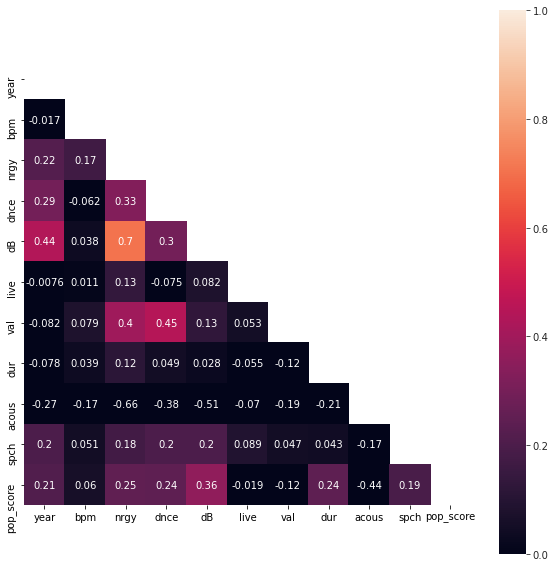

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

mask = np.zeros_like(dataset_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(10, 10))

with sns.axes_style("white"):
  ax = sns.heatmap(dataset_corr, mask=mask,vmin=0., vmax=1, square=True, annot=True)

plt.show()

In [24]:
# Drop variables that are weakly correlated to "pop_score"
dataset1_num_1= dataset1_num.drop(["bpm","live","val"], axis=1)

In [25]:
dataset1_num_1

,year,nrgy,dnce,dB,dur,acous,spch,pop_score
0,2000,34,55,-9,155,75,3,72
1,1948,34,42,-11,123,86,4,62
2,2013,49,26,-9,162,81,4,61
3,2011,43,49,-12,151,70,6,60
4,1959,38,56,-9,158,67,3,60
...,...,...,...,...,...,...,...,...
95,2011,80,65,-3,211,3,10,56
96,2011,79,76,-4,203,0,8,56
97,2011,89,67,-5,185,0,3,54
98,2017,75,76,-4,184,6,7,43


In [26]:
#Merge categorical and numerical data
dataset2 = pd.concat([dataset1_num_1,top_genre_enc_data_1], axis=1) # Final full dataset
dataset2

,year,nrgy,dnce,dB,dur,acous,spch,pop_score,adult standards,brill building pop,album rock,glam rock,europop,dance rock,dance pop,boy band,bubblegum dance,big room
0,2000,34,55,-9,155,75,3,72,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1948,34,42,-11,123,86,4,62,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2013,49,26,-9,162,81,4,61,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2011,43,49,-12,151,70,6,60,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1959,38,56,-9,158,67,3,60,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2011,80,65,-3,211,3,10,56,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
96,2011,79,76,-4,203,0,8,56,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
97,2011,89,67,-5,185,0,3,54,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
98,2017,75,76,-4,184,6,7,43,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# Split data for training and testing

In [27]:
#Define x and y
X = dataset2.drop(["pop_score"], axis=1)
y = dataset2["pop_score"]

In [28]:
#split train 80% and test 20%
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3,random_state=42)

In [29]:
X_train_num= X_train.iloc[:,:7]
X_train_num

,year,nrgy,dnce,dB,dur,acous,spch
86,1996,53,81,-12,294,34,19
54,1973,67,67,-8,323,26,5
9,1961,43,81,-12,144,55,9
86,1973,72,65,-5,178,68,4
9,2019,58,74,-9,265,19,3
...,...,...,...,...,...,...,...
10,1969,38,40,-7,277,70,3
45,1997,56,44,-7,191,6,3
8,1983,90,50,-7,183,36,18
71,1998,51,41,-10,264,70,3


In [30]:
X_test_num= X_test.iloc[:,:7]
X_test_num

,year,nrgy,dnce,dB,dur,acous,spch
87,2012,88,67,-3,195,6,4
2,1980,53,93,-6,215,11,16
101,1975,39,66,-9,184,45,3
44,2008,70,67,-9,222,4,28
11,1963,85,55,-6,149,66,4
...,...,...,...,...,...,...,...
19,2016,50,58,-7,206,20,3
99,1971,39,73,-12,116,84,4
76,1964,83,57,-4,127,9,3
13,1980,78,55,-6,162,42,5


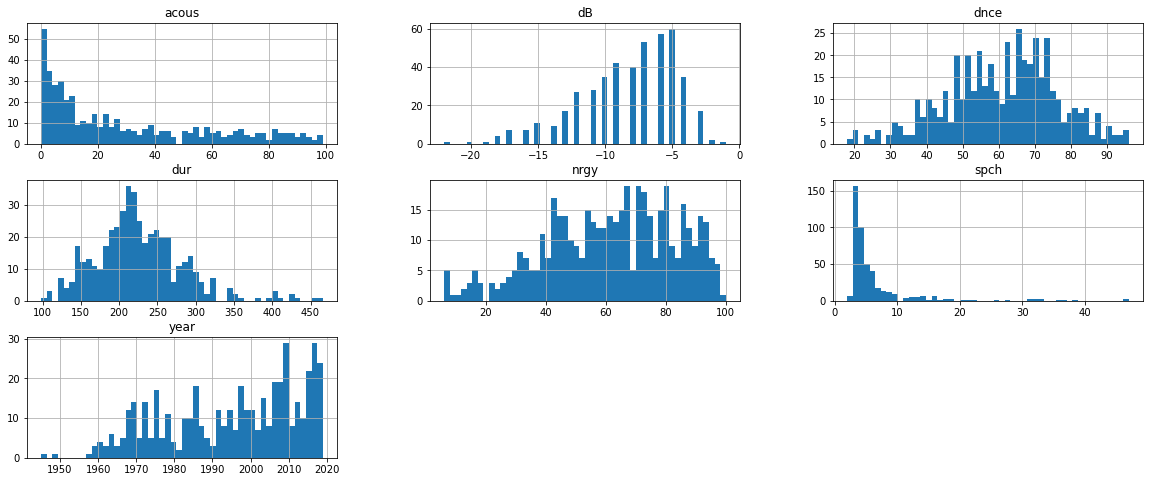

In [31]:
# Plot histogram to verify that the distribution of both sets are similar so that the learning from the train set can be applied to the test set.   
# X_train distribution
%matplotlib inline
X_train_num.hist(bins=50, figsize=(20,8))
plt.show()

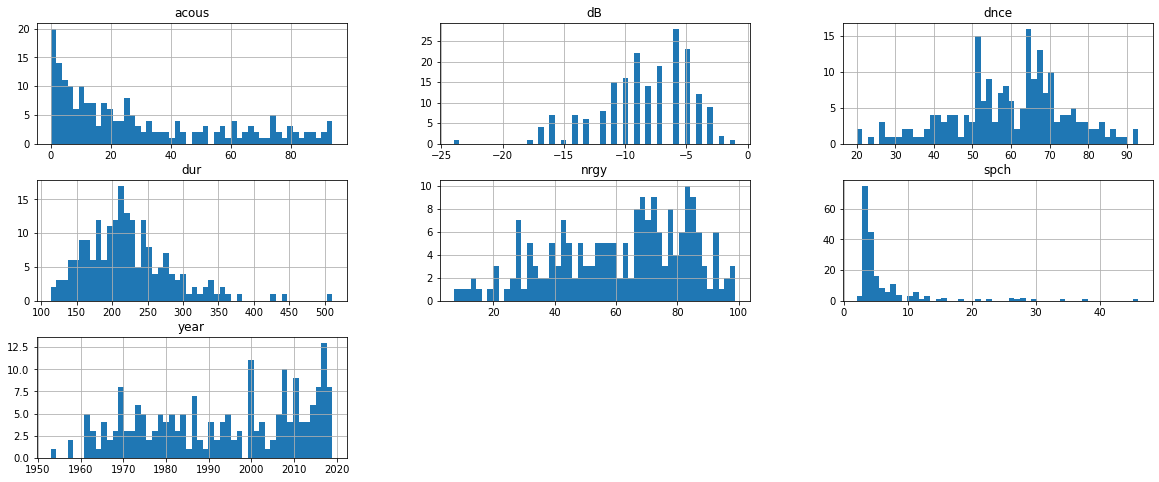

In [32]:
# X_test distribution
%matplotlib inline
X_test_num.hist(bins=50, figsize=(20,8))
plt.show()
#test and train sets have similar distribution

# Build Decision Tree Regressor

In [33]:
# Find RMSE of model on train and test sets
from sklearn.metrics import r2_score, mean_squared_error
import sklearn.metrics as metrics
from sklearn.tree import DecisionTreeRegressor 
train_RMSE_dt= []
test_RMSE_dt= []
for depth in range(1,15):
    tree_reg = DecisionTreeRegressor(max_depth=depth,random_state=42)
    tree_reg.fit(X_train, y_train)
    pred_train_dt=tree_reg.predict(X_train) 
    pred_test_dt=tree_reg.predict(X_test)
    train_RMSE_dt.append(np.sqrt(metrics.mean_squared_error(y_train, pred_train_dt)))
    test_RMSE_dt.append(np.sqrt(metrics.mean_squared_error(y_test, pred_test_dt)))


In [34]:
# train test RMSE table
# an overview of performance of training with different max-depths and its performance in predicting the test set.
train_test_RMSE_dt_table= pd.DataFrame({'max_depth':range(1,15), 'train_RMSE':train_RMSE_dt, 'test_RMSE':test_RMSE_dt})
train_test_RMSE_dt_table

,max_depth,train_RMSE,test_RMSE
0,1,11.641415,11.912967
1,2,10.728900,11.682177
2,3,10.097684,11.462846
3,4,9.440144,11.433555
4,5,8.870660,11.411057
5,6,8.181649,10.651141
6,7,7.568872,11.060454
7,8,6.990523,11.509894
8,9,6.334365,11.492916
9,10,5.771691,11.772854


Text(0, 0.5, 'performance')

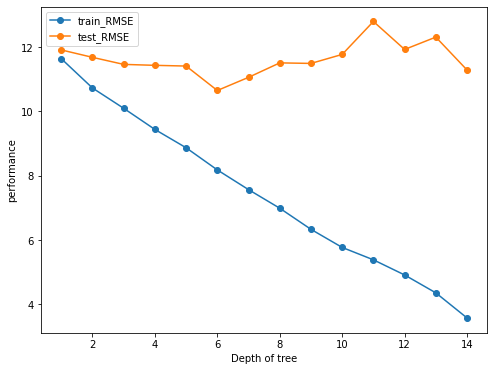

In [35]:
# plot train and test RMSE
train_test_RMSE_dt_table.plot('max_depth', y=['train_RMSE','test_RMSE'],kind='line',marker='o',figsize=(8,6))
plt.xlabel('Depth of tree')
plt.ylabel('performance')

# Visualize Decision Tree

In [36]:
#Decision tree regressor of max depth = 5
# max depth = 5 is chosen to reduce the impact of overfitting
tree_reg_1 = DecisionTreeRegressor(max_depth=5,random_state=42) 
tree_reg_1.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [37]:
# Specify column names for plotting tree
fn = X_train.columns

y_train_1= pd.DataFrame(y_train) # Convert y_train from array to dataframe
tn = y_train_1.columns

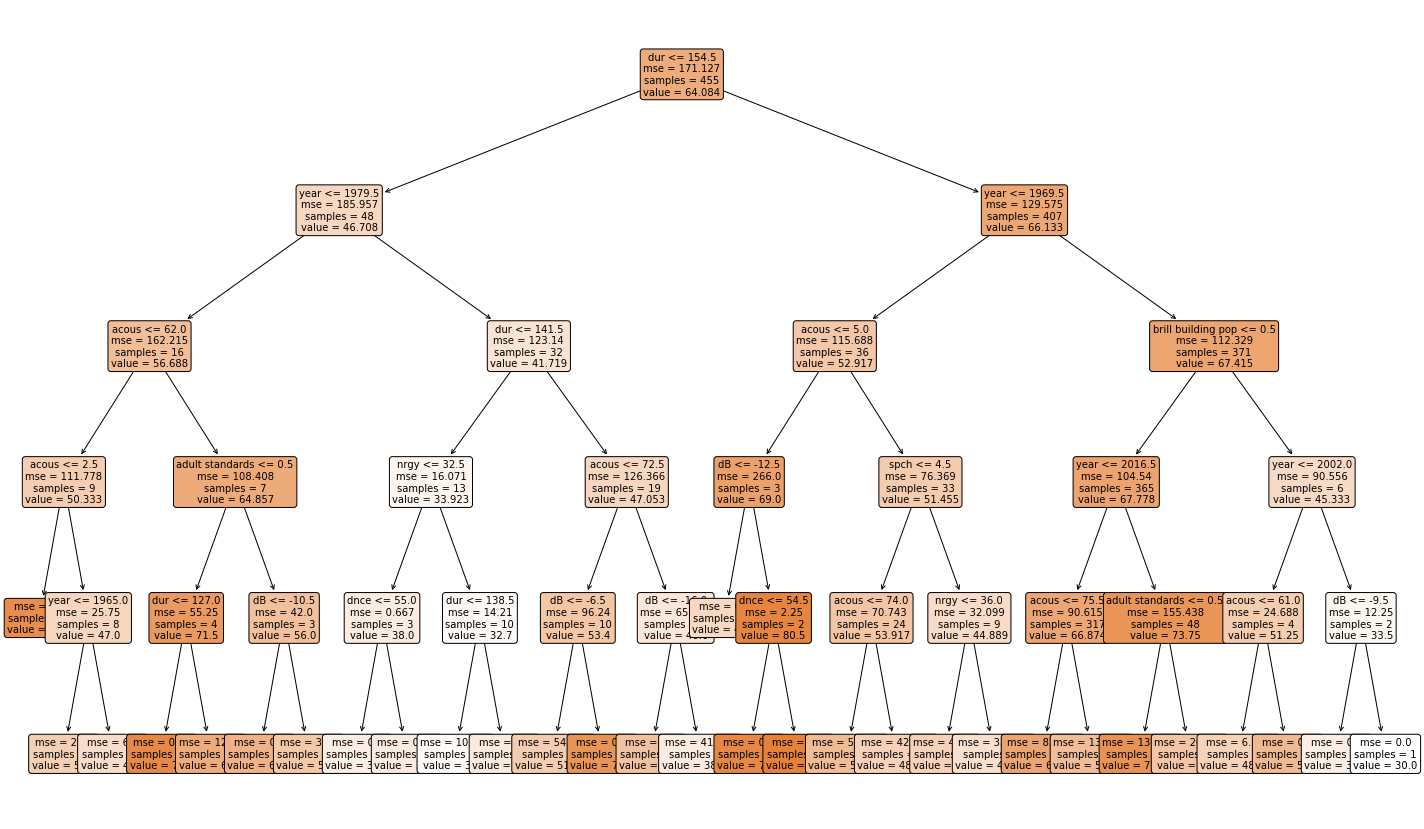

In [38]:
# Visualize tree with max depth= 5
from sklearn.tree import plot_tree
plt.figure(figsize=(25,15))
tree = plot_tree(tree_reg_1, feature_names=fn, class_names=tn, filled=True, rounded=True, fontsize=10)

In [39]:
# Create top 10 important attributes of decision tree
feature_importances_dt = pd.DataFrame(tree_reg_1.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances_dt.head(10)

,importance
dur,0.422515
year,0.279394
acous,0.133782
brill building pop,0.070703
adult standards,0.039469
dB,0.037961
spch,0.012683
nrgy,0.003350
dnce,0.000143
album rock,0.000000


In [40]:
# predict test set
pred_test_dt_1=tree_reg_1.predict(X_test)

In [41]:
# test actual vs predictions table
test_results_dt_table= pd.DataFrame({'actual_test':y_test, 'pred_test':pred_test_dt_1})
test_results_dt_table

,actual_test,pred_test
87,69,67.426667
2,82,67.426667
101,46,67.426667
44,73,67.426667
11,71,64.500000
...,...,...
19,74,67.426667
99,49,62.000000
76,43,50.000000
13,76,67.426667


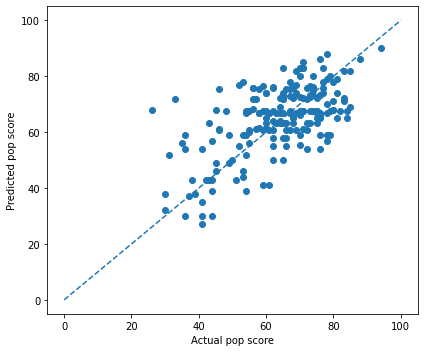

In [42]:
# test actual vs predictions chart
plt.figure(figsize=(6, 5))
plt.scatter(y_test, pred_test_dt)
plt.plot([0, 100], [0, 100], '--')
plt.axis('tight')
plt.xlabel('Actual pop score')
plt.ylabel('Predicted pop score')
plt.tight_layout()

# Build Random Forest Regressor

In [43]:
from sklearn.ensemble import RandomForestRegressor
train_RMSE_rf= []
test_RMSE_rf= []
for depth in range(1,15):
    rf_reg = RandomForestRegressor(max_depth=depth,random_state=42)
    rf_reg.fit(X_train, y_train)
    pred_train_rf= rf_reg.predict(X_train) 
    pred_test_rf= rf_reg.predict(X_test)
    train_RMSE_rf.append(np.sqrt(metrics.mean_squared_error(y_train, pred_train_rf)))
    test_RMSE_rf.append(np.sqrt(metrics.mean_squared_error(y_test, pred_test_rf)))

In [44]:
# train test RMSE table
# an overview of performance of training with different max-depths and its performance in predicting the test set.
train_test_RMSE_rf_table= pd.DataFrame({'max_depth':range(1,15), 'train_RMSE':train_RMSE_rf, 'test_RMSE':test_RMSE_rf})
train_test_RMSE_rf_table

,max_depth,train_RMSE,test_RMSE
0,1,11.283060,11.338384
1,2,10.236605,10.961069
2,3,9.522782,10.658451
3,4,8.821456,10.362157
4,5,8.104160,10.177930
5,6,7.406023,10.033552
6,7,6.727301,10.015096
7,8,6.124639,9.985695
8,9,5.594199,9.988674
9,10,5.112641,9.984527


Text(0, 0.5, 'performance')

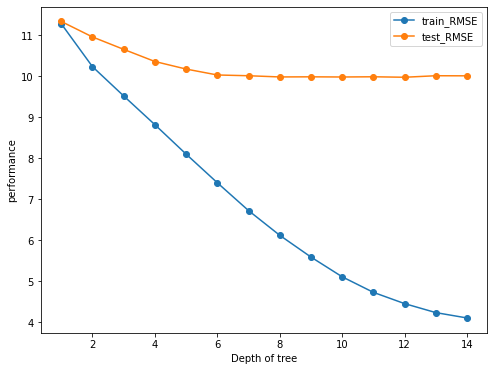

In [45]:
# plot train and test RMSE
train_test_RMSE_rf_table.plot('max_depth', y=['train_RMSE','test_RMSE'],kind='line',marker='o',figsize=(8,6))
plt.xlabel('Depth of tree')
plt.ylabel('performance')

In [46]:
#Random dorest regressor of max depth = 5
# max depth = 5 is chosen as the RMSE starts to level after max depth of 5 
rf_reg_1 = RandomForestRegressor(max_depth=5,random_state=42) 
rf_reg_1.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, random_state=42)

In [47]:
# predict test set
pred_test_rf_1=rf_reg_1.predict(X_test)

In [48]:
# test actual vs predictions table
test_results_rf_table= pd.DataFrame({'actual_test':y_test, 'pred_test':pred_test_rf_1})
test_results_rf_table

,actual_test,pred_test
87,69,67.641964
2,82,69.453543
101,46,64.383576
44,73,70.168421
11,71,62.678934
...,...,...
19,74,71.791369
99,49,50.725061
76,43,62.019607
13,76,64.601780


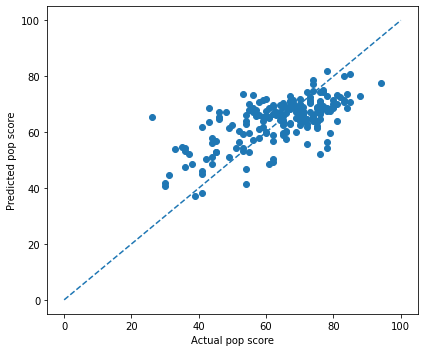

In [49]:
# test actual vs predictions chart
plt.figure(figsize=(6, 5))
plt.scatter(y_test, pred_test_rf)
plt.plot([0, 100], [0, 100], '--')
plt.axis('tight')
plt.xlabel('Actual pop score')
plt.ylabel('Predicted pop score')
plt.tight_layout()

# Build Gradient Boosting Regressor

In [50]:
from sklearn.ensemble import GradientBoostingRegressor
train_RMSE_gb= []
test_RMSE_gb= []
for depth in range(1,10):
    gradientboosting = GradientBoostingRegressor(learning_rate=0.1, n_estimators=100, max_depth=depth,random_state=42)
    gradientboosting.fit(X_train, y_train)
    pred_train_gb=gradientboosting.predict(X_train) 
    pred_test_gb=gradientboosting.predict(X_test)
    train_RMSE_gb.append(np.sqrt(metrics.mean_squared_error(y_train, pred_train_gb)))
    test_RMSE_gb.append(np.sqrt(metrics.mean_squared_error(y_test, pred_test_gb)))


In [51]:
# train test RMSE table
# an overview of performance of training with different max-depths and its performance in predicting the test set.
train_test_RMSE_gb_table= pd.DataFrame({'max_depth':range(1,10), 'train_RMSE':train_RMSE_gb, 'test_RMSE':test_RMSE_gb})
train_test_RMSE_gb_table

,max_depth,train_RMSE,test_RMSE
0,1,9.902354,10.604826
1,2,8.082963,9.935728
2,3,6.261464,9.961319
3,4,4.463090,9.777895
4,5,2.871579,10.345617
5,6,1.686540,10.535089
6,7,0.785723,10.582604
7,8,0.430380,10.822396
8,9,0.188832,10.443205


Text(0, 0.5, 'performance')

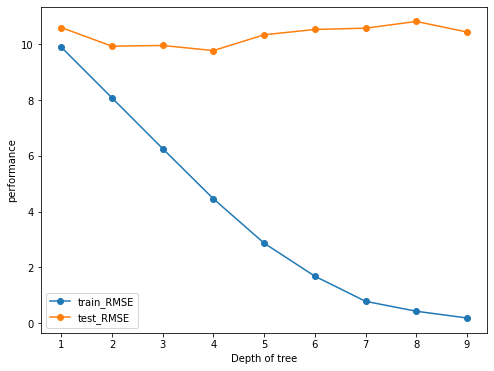

In [52]:
# plot train and test RMSE
train_test_RMSE_gb_table.plot('max_depth', y=['train_RMSE','test_RMSE'],kind='line',marker='o',figsize=(8,6))
plt.xlabel('Depth of tree')
plt.ylabel('performance')

In [53]:
#Gradient boosting regressor of max depth = 4
# max depth = 4 is chosen as the RMSE starts to rise after max depth of 4 
gradientboosting_1 = GradientBoostingRegressor(learning_rate=0.1, n_estimators=100, max_depth=4,random_state=42) 
gradientboosting_1.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=4, random_state=42)

In [54]:
# predict test set
pred_test_gb_1=gradientboosting_1.predict(X_test)

In [55]:
# test actual vs predictions table
test_results_gb_table= pd.DataFrame({'actual_test':y_test, 'pred_test':pred_test_gb_1})
test_results_gb_table

,actual_test,pred_test
87,69,67.485315
2,82,75.807797
101,46,64.107545
44,73,70.461994
11,71,62.943964
...,...,...
19,74,73.018207
99,49,55.928144
76,43,61.286422
13,76,68.492195


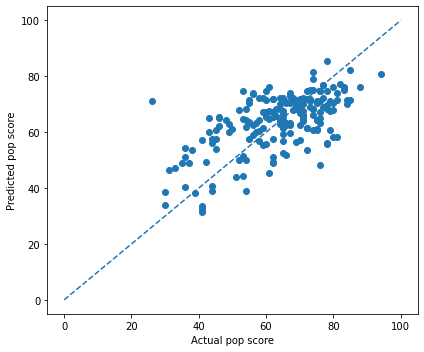

In [56]:
# test actual vs predictions chart
plt.figure(figsize=(6, 5))
plt.scatter(y_test, pred_test_gb)
plt.plot([0, 100], [0, 100], '--')
plt.axis('tight')
plt.xlabel('Actual pop score')
plt.ylabel('Predicted pop score')
plt.tight_layout()